## **K-Nearest Neighbors (KNN) Machine Learning Algorithm**

*Machine Learning - Python Notebook* by [*Prakash Ukhalkar*](https://github.com/prakash-ukhalkar)



#### What is KNN?

* K-Nearest Neighbors is one of the simplest and most intuitive supervised machine learning algorithms used for both classification and regression. 

* The core idea is simple: a new data point is classified based on the majority class of its **'K' nearest neighbors**.

#### How it Works: Step by Step

1.  **Choose a Value for K:** Decide on the number of neighbors to consider. This is a crucial hyperparameter.
2.  **Calculate the Distance:** For a new, unclassified data point, the algorithm calculates its distance to all other data points in the training dataset. The most common distance metric is **Euclidean distance**.
    
    $$ d(p, q) = \sqrt{\sum_{i=1}^{n} (q_i - p_i)^2} $$
    
3.  **Find the Nearest Neighbors:** Identify the `K` data points that are closest to the new point.
4.  **Vote for the Class:** The new data point is assigned to the class that is most frequent among its `K` nearest neighbors. This is a 'majority vote' system.
5.  **Prediction:** The final output is the class label for the new data point.


![kNN_Clasifier](https://res.cloudinary.com/dtoupvd2u/image/upload/v1683194217/sameer_2_d488e90f9c.png)

Image Source: [CERTISURED](https://certisured.com/blogs/k-nearest-neighbor-knn-algorithm-for-machine-learning)

#### Key Concepts & Classifier Metrics

* **Lazy Learner:** KNN is a 'lazy' algorithm because it doesn't have a training phase where it learns a model. It simply stores the training data and performs computations only when a prediction is needed.

* **Feature Scaling:** This is critical for KNN because it's a distance-based algorithm. If features have different scales, those with a larger range can disproportionately influence the distance calculation. We use `StandardScaler` to address this.

* **Minkowski Metric:** The `KNeighborsClassifier` in scikit-learn uses the Minkowski distance by default. This is a generalized distance metric that includes Euclidean (p=2) and Manhattan (p=1) distances as special cases.


**Evaluation Metrics:**

  * **Accuracy:** The ratio of correctly predicted instances to the total number of instances.

  * **Confusion Matrix:** A table that visualizes the performance of a classification model, showing the counts of correct and incorrect predictions for each class.
  
  * **Precision:** Of all instances predicted as positive, how many were actually positive?
  
  * **Recall:** Of all the actual positive instances, how many did the model correctly identify?
  
  * **F1-Score:** The harmonic mean of Precision and Recall, providing a balance between the two.

---

### **KNN Implementation with the Iris Dataset**

* This notebook demonstrates the KNN algorithm on the classic **Iris dataset**, a well-known multiclass dataset from `sklearn`. 

* The following steps will cover the full machine learning workflow.

#### Step 1: Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Set plotting styles for better visualization
plt.style.use('seaborn-v0_8-whitegrid')

#### Step 2: Load and Explore the Dataset

In [3]:
# Load the Iris dataset
iris = load_iris()

# Create a pandas DataFrame from the data
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                     columns=iris['feature_names'] + ['target'])

# Map the target numerical labels to their species names for clarity
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first few rows of the DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [4]:
# Display value counts for each species
print("\nClass distribution:\n", df['species'].value_counts())


Class distribution:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


#### Step 3: Visualize the Dataset

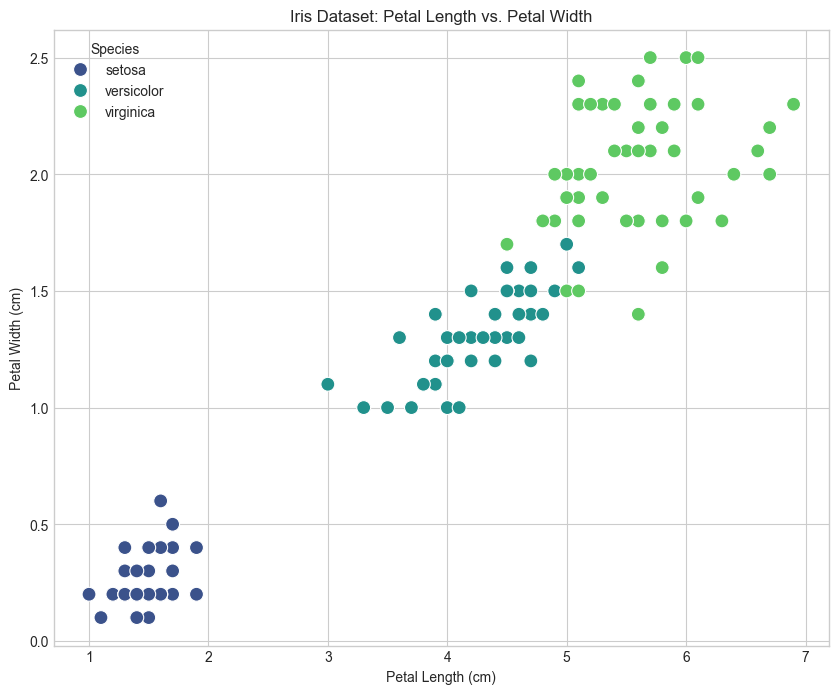

In [5]:
# Visualize the distribution of classes
plt.figure(figsize=(10, 8))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', data=df, palette='viridis', s=100)
plt.title('Iris Dataset: Petal Length vs. Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.show()

#### Step 4: Split the Data and Scale Features

In [25]:
# Define features (X) and target (y)
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of training data:", X_train_scaled.shape)
print("Shape of testing data:", X_test_scaled.shape)

Shape of training data: (120, 4)
Shape of testing data: (30, 4)


#### Step 5: Train the KNN Classifier

In [26]:
# Initialize the KNN classifier with K=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the scaled training data
knn.fit(X_train_scaled, y_train)

print("Model training complete.")

Model training complete.


#### Step 6: Make Predictions

In [27]:
# Make predictions on the scaled test data
y_pred = knn.predict(X_test_scaled)

print("Predictions for the first 10 test samples:", y_pred[:10])
print("Actual labels for the first 10 test samples:", y_test[:10])

Predictions for the first 10 test samples: [0 2 1 1 0 1 0 0 2 1]
Actual labels for the first 10 test samples: [0 2 1 1 0 1 0 0 2 1]


#### Step 7: Evaluate the Model (Classifier Metrics)

In [28]:
# Calculate kNN model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")


Accuracy: 0.9333


In [29]:
# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]


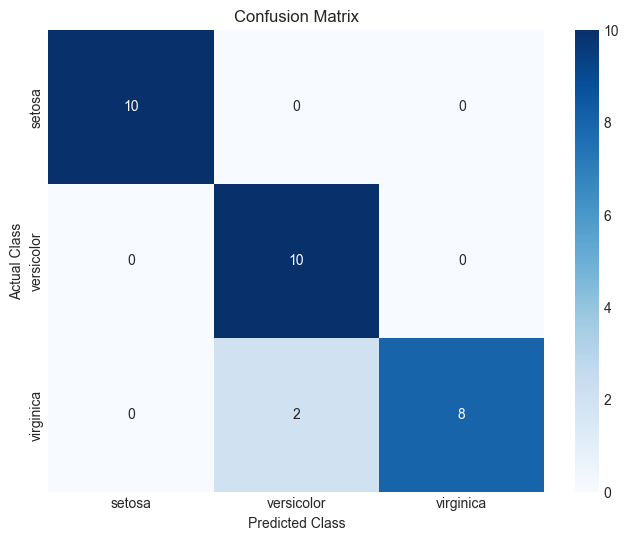

In [30]:
# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [31]:
# Calculate and print classification report
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("\nClassification Report:\n\n", report)


Classification Report:

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



### Summary

1.  **Model Performance:** The KNN classifier achieved an impressive accuracy of **~93.33%** on the test set, demonstrating its effectiveness for this dataset.

2.  **Confusion Matrix Analysis:** The model made only two misclassification, indicating that the classes in the Iris dataset are well-separated.

3.  **Precision, Recall, and F1-Score:** The high values for these metrics across all three classes confirm that the model is both accurate and robust, with a low rate of false positives and false negatives.

4.  **Feature Scaling:** The notebook demonstrates the importance of feature scaling for KNN. This preprocessing step ensures that the distance calculations are fair and accurate, leading to better model performance.

---

*Machine Learning - Python Notebook* by [*Prakash Ukhalkar*](https://github.com/prakash-ukhalkar)

---

#### **Exercise: K-Nearest Neighbors (KNN) Classification for Handwritten Digit Recognition**

#### Problem Statement

* Build and evaluate a **K-Nearest Neighbors (KNN)** model to classify handwritten digits (0-9). 

* The goal is to create a model capable of accurately recognizing the digits based on their pixel data.

#### Tasks to be Performed

  1.  **Data Loading and Exploration:** Load the digits dataset and understand its structure.
  
  2.  **Data Preprocessing:** Scale the feature values to prepare the data for KNN.
  
  3.  **Data Splitting:** Divide the dataset into training and testing subsets.
  
  4.  **Model Training:** Train the KNN classifier on the training data.
  
  5.  **Prediction:** Use the trained model to predict digits on the test data.
  
  6.  **Model Evaluation:** Assess the model's performance using classification metrics.
  
  7.  **Summary of Insights:** Analyze and summarize the key findings.

---

* Download Dataset:  Load the `digits` dataset from `scikit-learn`
* Solution : [Exercise: K-Nearest Neighbors (KNN) Classification for Handwritten Digit Recognition](https://github.com/prakash-ukhalkar/ML/blob/main/13_kNN_Classification_ML/01_Exercise_kNN_Classification_ML/01_Exercise_kNN_Classification_ML.ipynb)

---

*Machine Learning - Python Notebook* by [*Prakash Ukhalkar*](https://github.com/prakash-ukhalkar)